# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [89]:
data = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df =  pd.read_csv(data,sep='\t')

df  

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called chipo.

In [90]:

chipo = df

### Step 4. See the first 10 entries

In [91]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [92]:
hist = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)
top_5 = hist[:5]
top_5


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [93]:
top_5.reset_index()

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


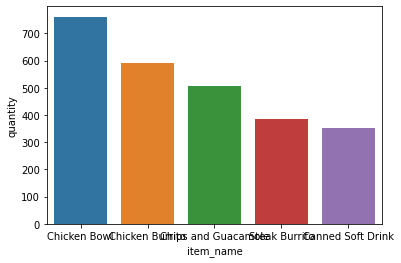

In [124]:
sns.barplot(y = 'quantity', x = 'item_name', data = top_5.reset_index()
    
)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [110]:
price = chipo.item_price.str.slice(1).astype(float)
price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [121]:
chipo['price'] = price

Text(0.5, 1.0, 'Number of items ordered per order price')

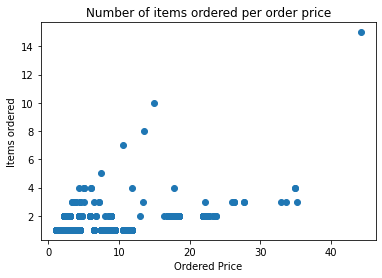

In [122]:
plt.scatter (x = 'price' , y = 'quantity', data = chipo)
plt.xlabel('Ordered Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [162]:
hist1 = chipo.groupby('order_id').quantity.sum().sort_values(ascending = False)
top_10 = hist1[:10]
top_10


order_id
1443    35
926     23
1786    20
1660    19
759     18
511     17
1559    16
1483    14
205     12
577     11
Name: quantity, dtype: int64

In [163]:
top_10.reset_index()

,order_id,quantity
0,1443,35
1,926,23
2,1786,20
3,1660,19
4,759,18
5,511,17
6,1559,16
7,1483,14
8,205,12
9,577,11


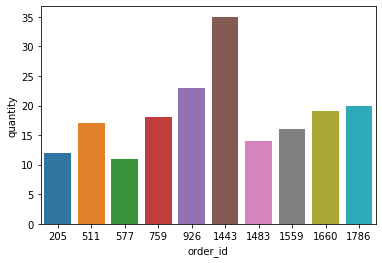

In [164]:
sns.barplot(y = 'quantity', x = 'order_id', data = top_10.reset_index()
    
)